In [157]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                  header=None)

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [159]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                  header=None)

In [160]:
df.columns = ['age','sex','cp','restbp','chol','fbs', 'restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [162]:
df.describe(include='all')

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


### clean up colums with "?"" in them 

In [163]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [164]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [165]:
df[df['ca']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [166]:
df[df['thal']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [167]:
to_drop = list(df[df['ca']=='?'].index.values) + list(df[df['thal']=='?'].index.values)

In [168]:
df.drop(to_drop, axis=0, inplace=True)

### convert 'ca' and 'thal' into numerical variables

In [169]:
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    float64
 12  thal     297 non-null    float64
 13  hd       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


### Data exploration -- continuous variable

<Axes: xlabel='hd', ylabel='thalach'>

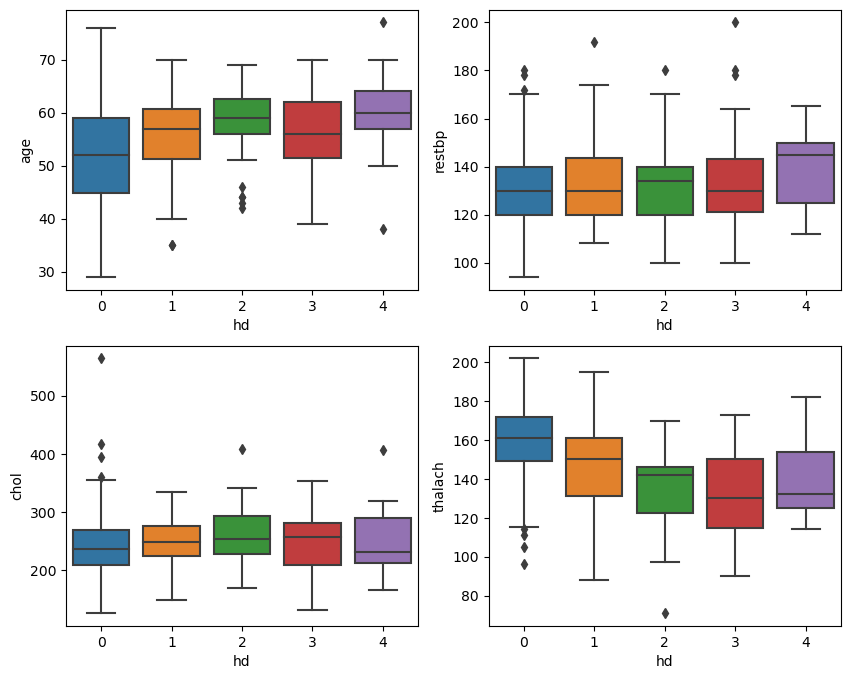

In [171]:
import seaborn as sns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='hd',y='age', data=df, ax=ax1)
sns.boxplot(x='hd',y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd',y='chol', data=df, ax=ax3)
sns.boxplot(x='hd',y='thalach', data=df, ax=ax4)


- age in years
- sex (1 = male; 0 = female)
- cp: chest pain type. 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)

- chol :serum cholestoral in mg/dl

- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- restecg:resting electrocardiographic results. 0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST, elevation or depression of > 0.05 mV) 2: showing probable or definite left ventricular hypertrophy by Estes\' criteria

- thalach :maximum heart rate achieved

- exang: exercise induced angina (1 = yes; 0 = no)

- oldpeak: ST depression induced by exercise relative to rest

- slope: the slope of the peak exercise ST segment 1: upsloping, 2: flat, 3: downsloping

- ca: number of major vessels (0-3) colored by flourosopy (4 missing values)

- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (2 missing values)

- num: diagnosis of heart disease (angiographic disease status). 0: < 50 1: > 50 (in any major vessel: attributes 59 through 68 are vessels)

### check the categorical variables 

In [172]:
# map 1-4 to type 1 
mapping = {0:0, 1:1, 2:1, 3:1, 4:1}
df['hd_cons']=df['hd'].map(mapping)


In [173]:
df.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd_cons
hd,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [174]:
df.groupby('hd_cons').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
hd_cons,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,137,137,137,137


<Axes: xlabel='hd_cons', ylabel='thalach'>

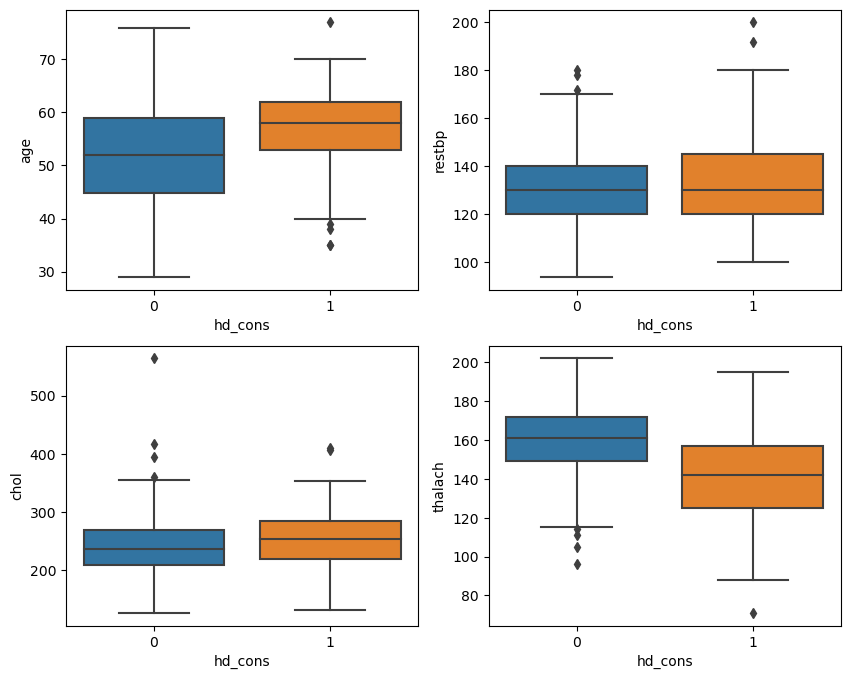

In [175]:
ig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='hd_cons',y='age', data=df, ax=ax1)
sns.boxplot(x='hd_cons',y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd_cons',y='chol', data=df, ax=ax3)
sns.boxplot(x='hd_cons',y='thalach', data=df, ax=ax4)

In [176]:
df.groupby(['hd','sex'])['thal'].count().unstack()

sex,0.0,1.0
hd,,
0,71,89
1,9,45
2,7,28
3,7,28
4,2,11


In [177]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd', 'hd_cons'],
      dtype='object')

In [178]:
df.groupby(['hd','cp'])['thal'].count().unstack()

cp,1.0,2.0,3.0,4.0
hd,,,,
0,16.0,40.0,65.0,39.0
1,5.0,6.0,9.0,34.0
2,1.0,1.0,4.0,29.0
3,NaN,2.0,4.0,29.0
4,1.0,NaN,1.0,11.0


In [179]:
fbs=df.groupby(['hd','fbs'])['thal'].count().unstack()
# blood sugar is not a good predictive of heart disease
fbs

fbs,0.0,1.0
hd,,
0,137,23
1,51,3
2,27,8
3,27,8
4,12,1


In [180]:
fbs['total'] = fbs[0.0] + fbs[1.0]

In [181]:
fbs[0.0]/fbs['total']

hd
0    0.856250
1    0.944444
2    0.771429
3    0.771429
4    0.923077
dtype: float64

In [182]:
fbs[1.0]/fbs['total']

hd
0    0.143750
1    0.055556
2    0.228571
3    0.228571
4    0.076923
dtype: float64

In [183]:
df.groupby(['hd','restecg'])['thal'].count().unstack()

restecg,0.0,1.0,2.0
hd,,,
0,92.0,1.0,67.0
1,23.0,NaN,31.0
2,18.0,1.0,16.0
3,12.0,1.0,22.0
4,2.0,1.0,10.0


In [184]:
df.groupby(['hd','exang'])['thal'].count().unstack()
# exang is a good predictor for hd

exang,0.0,1.0
hd,,
0,137,23
1,30,24
2,14,21
3,12,23
4,7,6


In [185]:
df.groupby(['hd','slope'])['thal'].count().unstack()

slope,1.0,2.0,3.0
hd,,,
0,103,48,9
1,22,30,2
2,7,25,3
3,6,24,5
4,1,10,2


In [186]:
df.groupby(['hd','ca'])['thal'].count().unstack()

ca,0.0,1.0,2.0,3.0
hd,,,,
0,129,21,7,3
1,26,19,6,3
2,8,14,9,4
3,8,8,14,5
4,3,3,2,5


<Axes: xlabel='hd'>

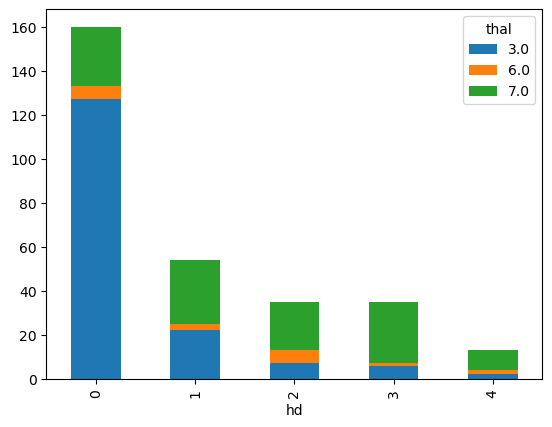

In [187]:
df.groupby(['hd','thal'])['ca'].count().unstack().plot(kind='bar', stacked=True)
# plot is for better unsderstanding of the data

In [188]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd', 'hd_cons'],
      dtype='object')

In [189]:
# find the categorical columns
cat_columns = ['sex', 'cp', 'restecg', 'slope', 'ca', 'thal','exang','fbs']

In [190]:
X = df.iloc[:,:13]
Y = df.iloc[:,13]

In [191]:
Y_v2 = df.iloc[:,14]

In [192]:
Y_v2

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd_cons, Length: 297, dtype: int64

In [193]:
X_encoded = pd.get_dummies(X, columns=cat_columns, dtype=int)

In [194]:
X_encoded

,age,restbp,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,exang_0.0,exang_1.0,fbs_0.0,fbs_1.0
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
298,45.0,110.0,264.0,132.0,1.2,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
299,68.0,144.0,193.0,141.0,3.4,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
300,57.0,130.0,131.0,115.0,1.2,0,1,0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, random_state=123)

In [196]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)

[Text(0.5718984962406015, 0.9583333333333334, 'thal_3.0 <= 0.5\ngini = 0.644\nsamples = 222\nvalue = [120, 43, 24, 25, 10]\nclass = 0'),
 Text(0.29793233082706766, 0.875, 'cp_4.0 <= 0.5\ngini = 0.784\nsamples = 96\nvalue = [24, 23, 19, 21, 9]\nclass = 0'),
 Text(0.125, 0.7916666666666666, 'oldpeak <= 2.4\ngini = 0.645\nsamples = 35\nvalue = [19, 6, 3, 5, 2]\nclass = 0'),
 Text(0.08082706766917293, 0.7083333333333334, 'thalach <= 126.0\ngini = 0.568\nsamples = 31\nvalue = [19, 6, 3, 3, 0]\nclass = 0'),
 Text(0.03759398496240601, 0.625, 'restbp <= 125.0\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1, 0]\nclass = 2'),
 Text(0.022556390977443608, 0.5416666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]\nclass = 3'),
 Text(0.05263157894736842, 0.5416666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]\nclass = 2'),
 Text(0.12406015037593984, 0.625, 'restbp <= 176.0\ngini = 0.487\nsamples = 28\nvalue = [19, 6, 1, 2, 0]\nclass = 0'),
 Text(0.08270676691729323, 0.54166

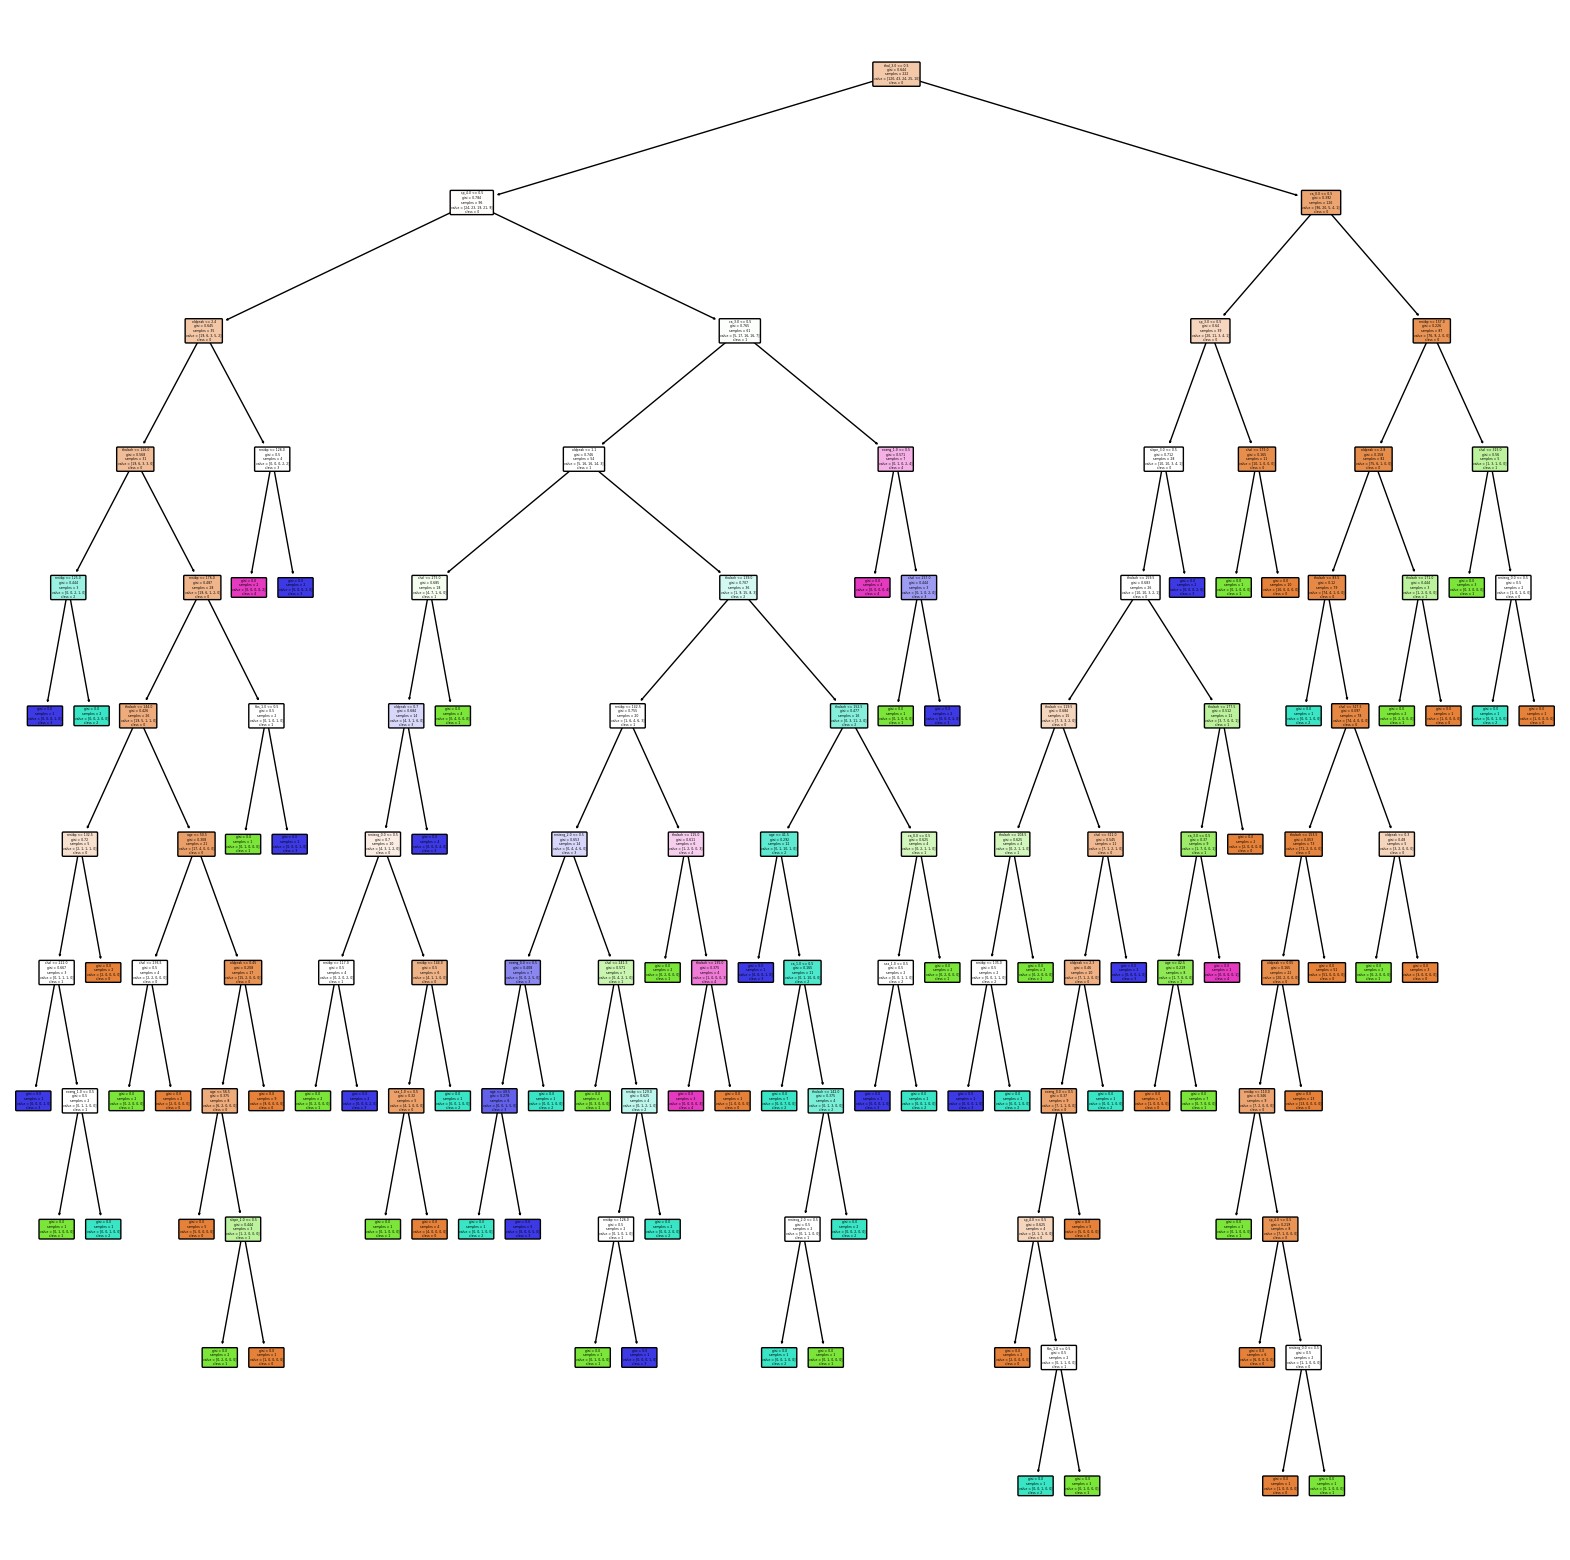

In [197]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1','2','3','4'], feature_names=X_encoded.columns)

[Text(0.5384615384615384, 0.9583333333333334, 'thal_3.0 <= 0.5\ngini = 0.497\nsamples = 222\nvalue = [120, 102]\nclass = no_hd'),
 Text(0.2860576923076923, 0.875, 'cp_4.0 <= 0.5\ngini = 0.375\nsamples = 96\nvalue = [24, 72]\nclass = hd'),
 Text(0.16826923076923078, 0.7916666666666666, 'ca_0.0 <= 0.5\ngini = 0.496\nsamples = 35\nvalue = [19, 16]\nclass = no_hd'),
 Text(0.07692307692307693, 0.7083333333333334, 'slope_1.0 <= 0.5\ngini = 0.391\nsamples = 15\nvalue = [4, 11]\nclass = hd'),
 Text(0.038461538461538464, 0.625, 'ca_3.0 <= 0.5\ngini = 0.18\nsamples = 10\nvalue = [1, 9]\nclass = hd'),
 Text(0.019230769230769232, 0.5416666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = hd'),
 Text(0.057692307692307696, 0.5416666666666666, 'thalach <= 142.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = hd'),
 Text(0.038461538461538464, 0.4583333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = hd'),
 Text(0.07692307692307693, 0.4583333333333333, 'gini = 0.0\nsamples = 

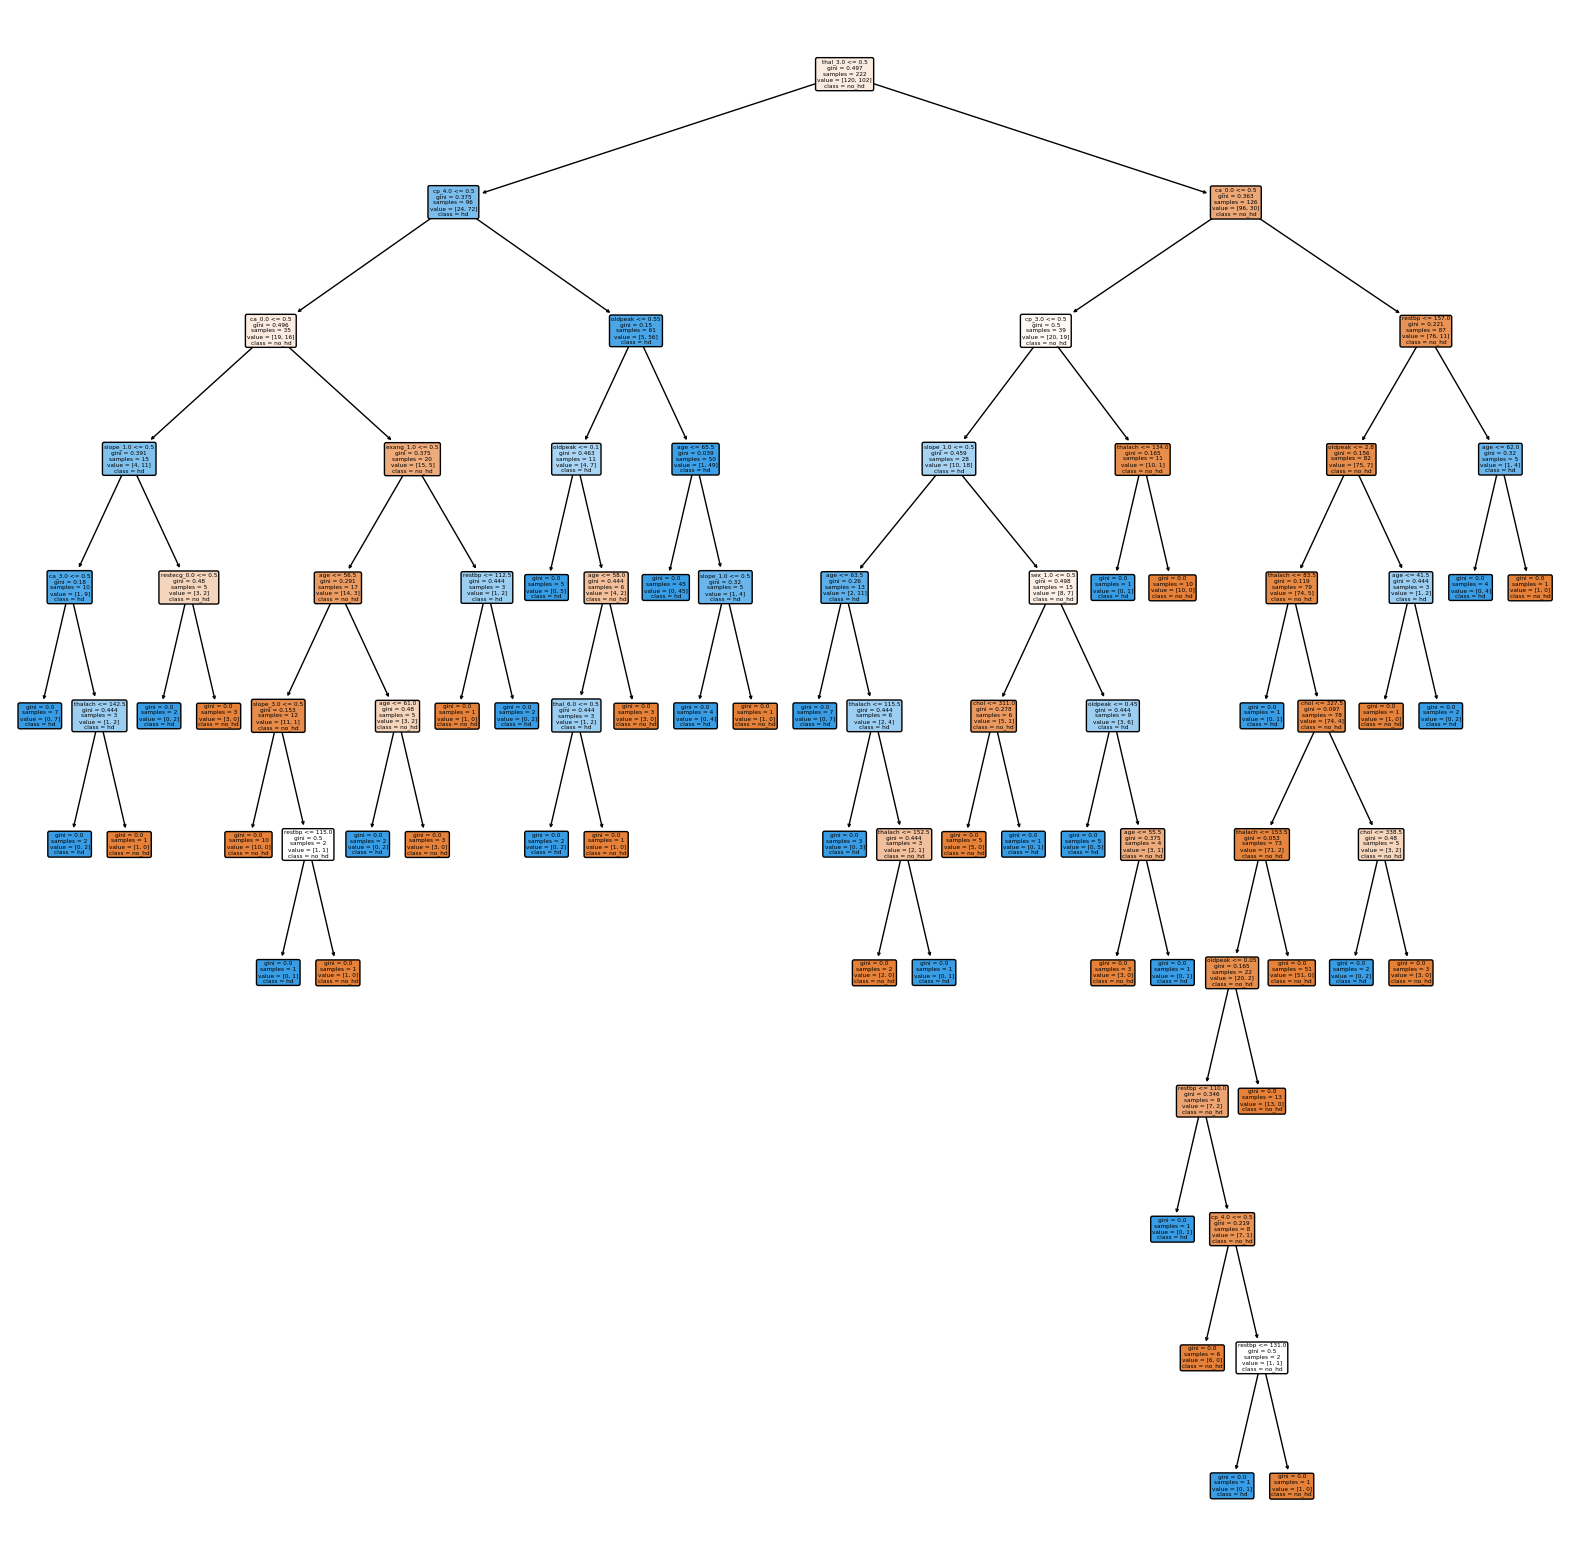

In [198]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, Y_v2, random_state=123)
dt_v2 = DecisionTreeClassifier(random_state=123)
dt_v2 = dt_v2.fit(X_train2, y_train2)
plt.figure(figsize=(20,20))
plot_tree(dt_v2, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns)

In [199]:
predicted = dt.predict(X_test)

In [200]:
predicted

array([0, 4, 0, 0, 2, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 3, 0, 0, 0, 1, 3,
       0, 1, 2, 3, 0, 0, 0, 3, 3, 4, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 2, 0, 0, 0, 3, 1, 2, 1, 0,
       3, 1, 0, 0, 2, 1, 0, 0, 3])

In [201]:
predicted_v2 = dt_v2.predict(X_test)

In [202]:
print('v1_model: ', accuracy_score(predicted, y_test))
print('v2_model: ', accuracy_score(predicted_v2, y_test2))

v1_model:  0.5066666666666667
v2_model:  0.7733333333333333


In [204]:
predicted_train = dt.predict(X_train)
print(accuracy_score(predicted_train, y_train))

1.0


### add max depth and min samples leaf 

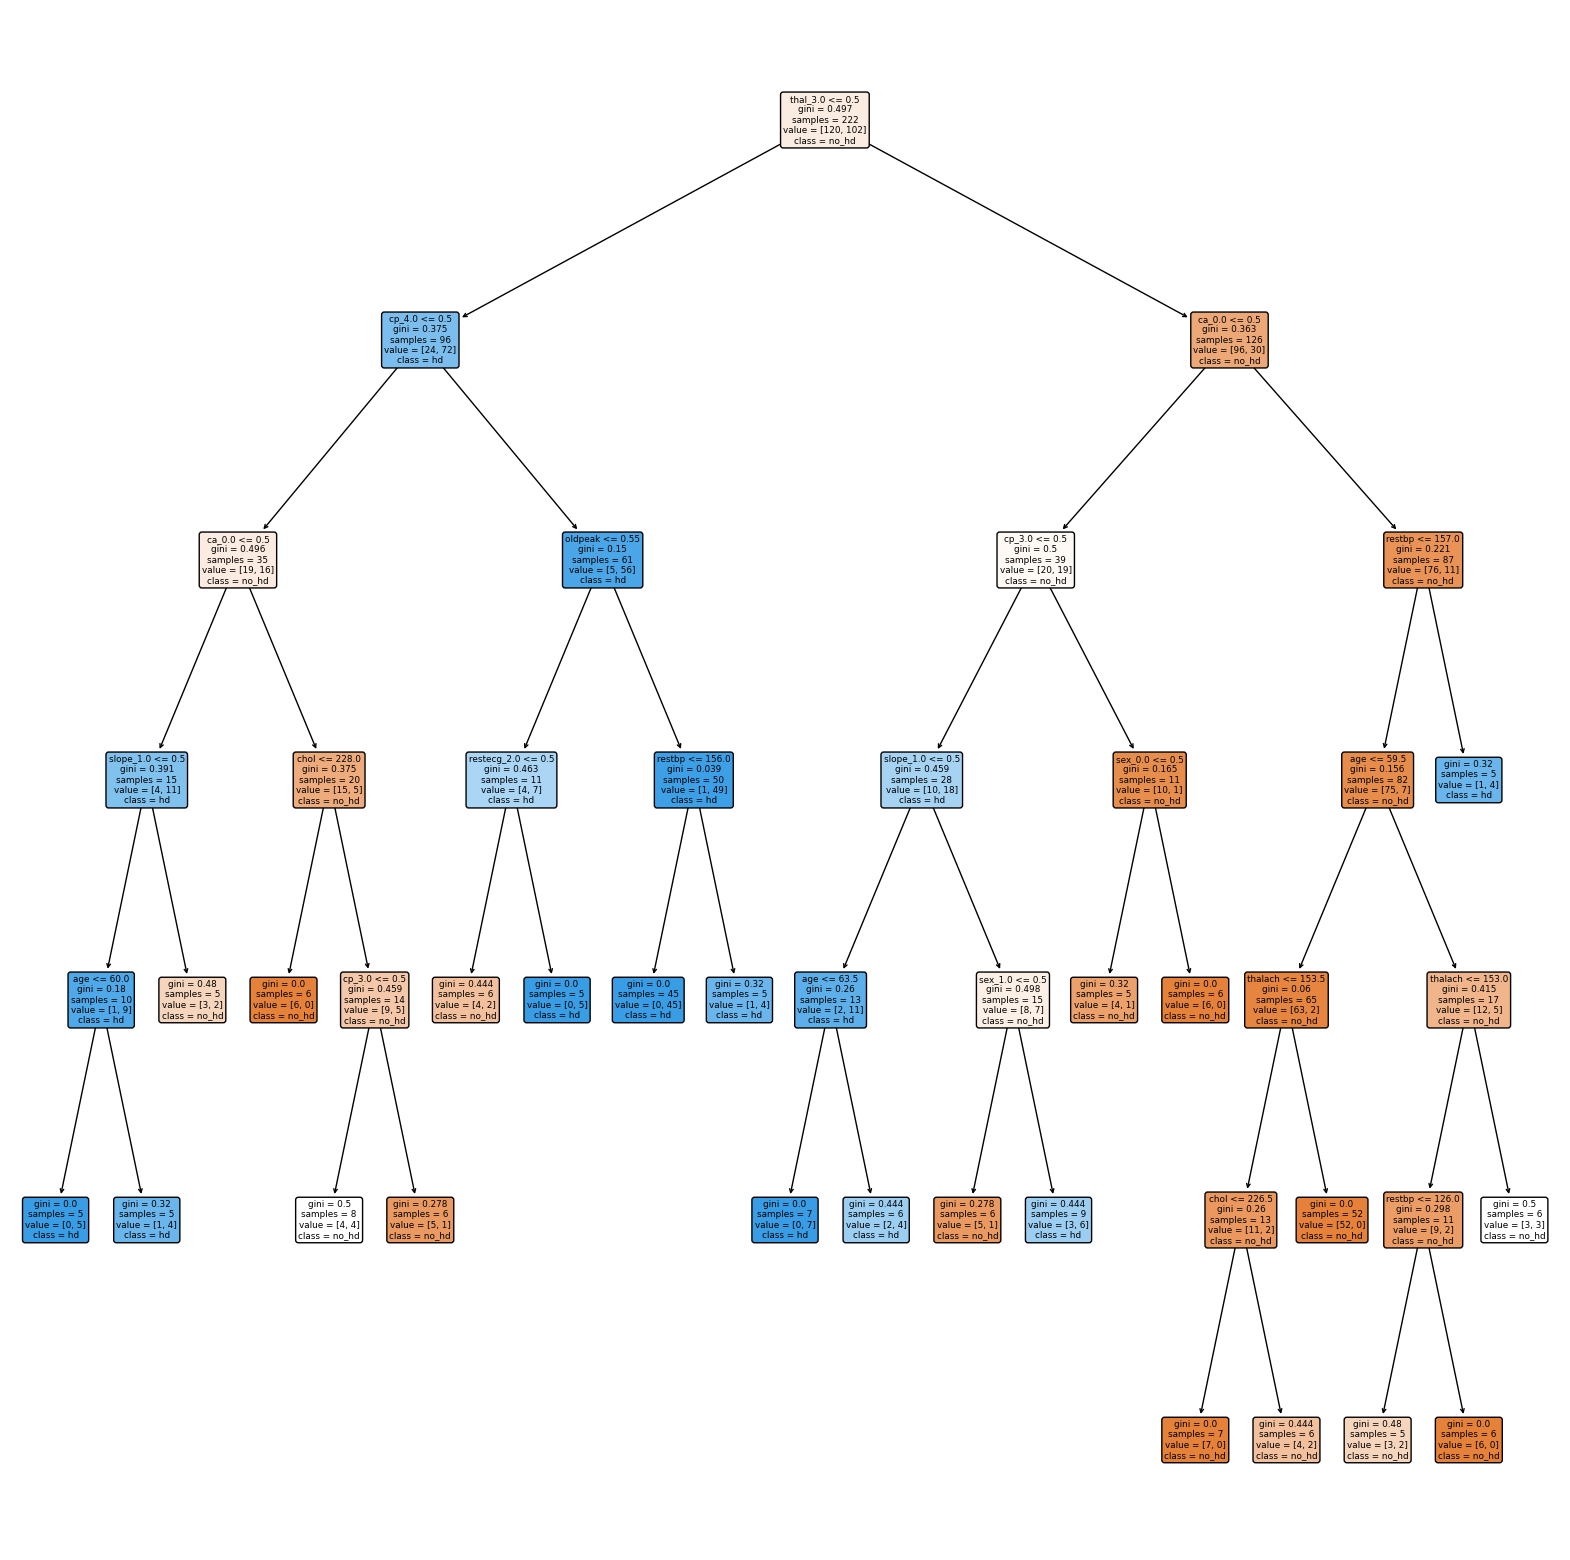

In [205]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_encoded, Y_v2, random_state=123)
dt_v3 = DecisionTreeClassifier(random_state=123, max_depth = 6, min_samples_leaf = 5,)
dt_v3 = dt_v3.fit(X_train3, y_train3)
plt.figure(figsize=(20,20))
plot_tree(dt_v3, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns);

In [207]:
pred3 = dt_v3.predict(X_test3)

In [209]:
print(accuracy_score(pred3, y_test3))

0.8266666666666667


In [213]:
pred3_train = dt_v3.predict(X_train3)
print(accuracy_score(y_train3, pred3_train)) # little overfitting but ok

0.8828828828828829


In [211]:
from sklearn.neighbors import KNeighborsClassifier

In [212]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train3, y_train3)
pred3_knn = knn.predict(X_test3)
print(accuracy_score(pred3_knn, y_test3))

0.6266666666666667
